# Датасет


Ссылка на датасет: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-and-reviews
Датасет "Video Games Sales.csv" содержит информацию о продажах видеоигр. Он включает рейтинг, региональные продажи, названия, жанры, издателей, платформы, отзывы и год выпуска. Данные предоставляют обширный обзор индустрии видеоигр, подходят для анализа трендов и проведения исследований.

В качестве задачи регрессии я обучаю модель на предсказание мировых продаж игры исходя из ее жанра и года выпуска.
В качестве задачи классификации я обучаю модель на предсказание года выпуска игры исходя из жанра и количества проданных единиц в разных регионах.

# Регрессия

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error

Простая реализация линейной регрессии с использованием метода наименьших квадратов для обучения модели.

In [ ]:
class MyLinearRegression():
  def __init__(self):
    self.coef = []

  def fit(self, X, y):
    self.coef = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

  def predict(self, X):
    return np.dot(self.coef, X.T)

## Датасет:


Пропущенные значения в числовых столбцах заменяются на их средние значения.

In [ ]:
data = pd.read_csv('./VideoGamesSales.csv')
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
data.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


Определены списки числовых и категориальных столбцов, а также выбрана целевая переменная.

In [ ]:
num_cols = [
    'Rank',              # Ранг видеоигры по глобальным продажам
    'Europe',            # Количество проданных единиц в Европе (в миллионах)
    'Japan',             # Количество проданных единиц в Японии (в миллионах)
    'Rest of World',     # Предполагается, что есть столбец 'Rest of World', но не определен в предоставленных данных
    'North America',     # Количество проданных единиц в Северной Америке (в миллионах)
    'Review'             # Предполагается, что есть столбец 'Review', но не определен в предоставленных данных
]

cat_cols = [
    'Genre',            # Жанр игры, например, экшн, приключения, гонки и т. д.
    'Year',             # Год выпуска игры
    'Game Title'        # Название игры
]

target_col = 'Global'   # Количество проданных единиц в мире (в миллионах)

cols = num_cols + cat_cols + [target_col]

In [ ]:
data = data[cols]
data.head()

,Rank,Europe,Japan,Rest of World,North America,Review,Genre,Year,Game Title,Global
0,1,28.39,3.77,8.54,40.43,76.28,Sports,2006.0,Wii Sports,81.12
1,2,3.58,6.81,0.77,29.08,91.00,Platform,1985.0,Super Mario Bros.,40.24
2,3,12.22,3.63,3.21,14.50,82.07,Racing,2008.0,Mario Kart Wii,33.55
3,4,10.51,3.18,3.01,14.82,82.65,Sports,2009.0,Wii Sports Resort,31.52
4,5,2.26,4.22,0.58,23.20,88.00,Puzzle,1989.0,Tetris,30.26


## Обучим неподготовленные данные

Обучающий набор составляет 80% данных, а тестовый - 20%.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[num_cols].values, data[target_col].values, test_size=0.2)


Масштабирование данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler

pca = MinMaxScaler()
pca.fit(X_train)
X_train = pca.transform(X_train)

Функция для вывода метрик:
1. Коэффициент детерминации (R^2)
2. Среднеквадратическая ошибка (MSE)

In [ ]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

### Константный предиктор

In [ ]:
dr = DummyRegressor()
dr.fit(X_train, y_train)

print_metrics(dr.predict(X_test), y_test)

R^2: 0.0
MSE: 24.053106949183345


### Линейная регрессия

Судя по результатам, моя реализация линейной регрессии сопоставима со встроенной в sklern

In [ ]:
lr = MyLinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: 0.5680435954480443
MSE: 4.192139833615165


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: 0.5680329256662653
MSE: 4.192188602622477


### Проверка на пустые значения

In [ ]:
data.isna().mean()

Rank             0.0
Europe           0.0
Japan            0.0
Rest of World    0.0
North America    0.0
Review           0.0
Genre            0.0
Year             0.0
Game Title       0.0
Global           0.0
dtype: float64

Колонка с названиями слишком неравномерна, и будет мешать при обучении

In [ ]:
data = data.drop(columns=['Game Title'])
cat_cols.remove('Game Title')

array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'Europe'}>,
        <Axes: title={'center': 'Japan'}>],
       [<Axes: title={'center': 'Rest of World'}>,
        <Axes: title={'center': 'North America'}>,
        <Axes: title={'center': 'Review'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Global'}>, <Axes: >]], dtype=object)

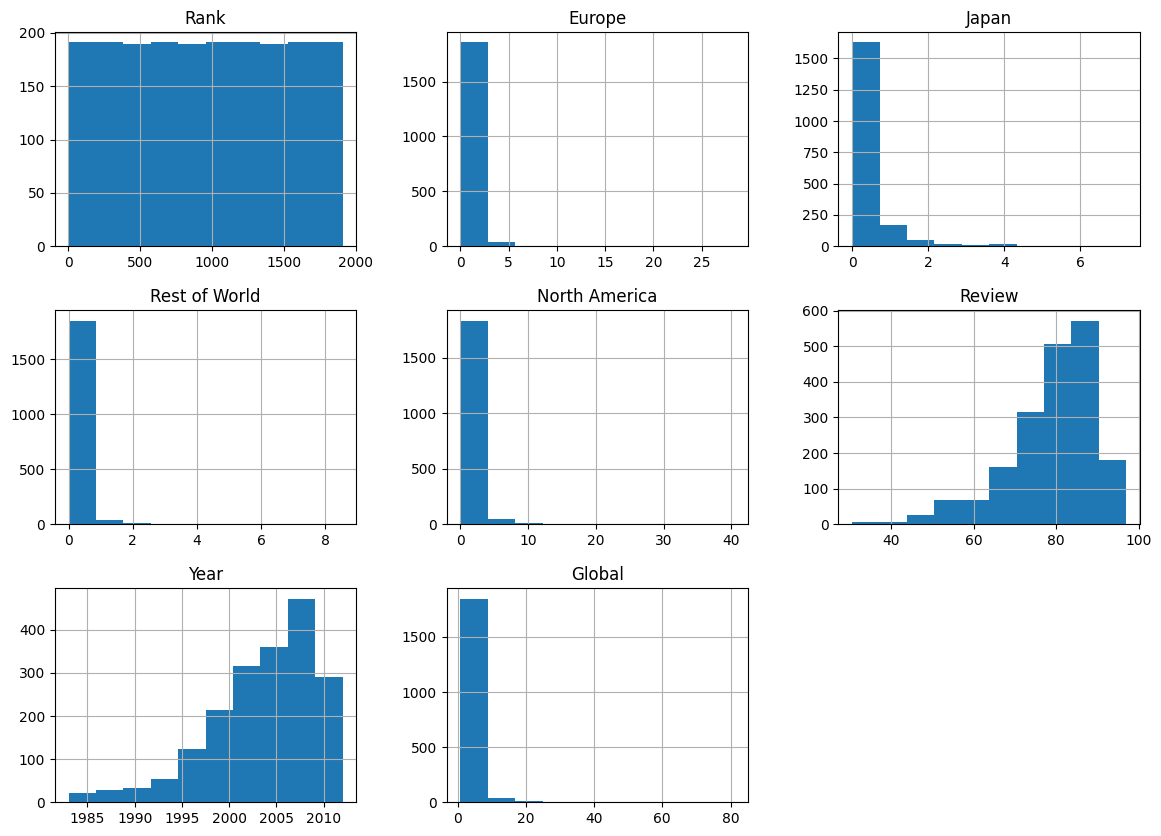

In [ ]:
data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))

Добавляю в датафрейм колонки для всех категориальных столбцов

In [ ]:
cat_genre = data['Genre']
cat_genre = pd.get_dummies(cat_genre)
data = data.drop(columns=['Genre'])
cat_cols.remove('Genre')

data = data.join(cat_genre)
cat_cols.extend(list(cat_genre.columns))
cat_cols

['Year',
 'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [ ]:
data.head()

,Rank,Europe,Japan,Rest of World,North America,Review,Year,Global,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1,28.39,3.77,8.54,40.43,76.28,2006.0,81.12,False,False,False,False,False,False,False,False,False,False,True,False
1,2,3.58,6.81,0.77,29.08,91.00,1985.0,40.24,False,False,False,False,True,False,False,False,False,False,False,False
2,3,12.22,3.63,3.21,14.50,82.07,2008.0,33.55,False,False,False,False,False,False,True,False,False,False,False,False
3,4,10.51,3.18,3.01,14.82,82.65,2009.0,31.52,False,False,False,False,False,False,False,False,False,False,True,False
4,5,2.26,4.22,0.58,23.20,88.00,1989.0,30.26,False,False,False,False,False,True,False,False,False,False,False,False


## Обучение подготовленных данных

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[num_cols + cat_cols].values, data[target_col].values, test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

pca = MinMaxScaler()
pca.fit(X_train)
X_train = pca.transform(X_train)

In [ ]:
pca = MinMaxScaler()
pca.fit(X_test)
X_test = pca.transform(X_test)

### Константный предиктор

In [ ]:
dr = DummyRegressor()
dr.fit(X_train, y_train)

print_metrics(dr.predict(X_test), y_test)

R^2: 0.0
MSE: 24.053106949183345


### Линейная регрессия

Судя по результатам, моя реализация линейной регрессии сопоставима со встроенной в sklern

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: 0.5680329256662653
MSE: 4.192188602622477


In [ ]:
lr = MyLinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: 0.5680435954480443
MSE: 4.192139833615165


# Классификация


In [ ]:
from sklearn.linear_model import LogisticRegression

Реализация логистической регрессии с использованием метода градиентного спуска.

In [ ]:
class MyLogisticRegression():
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        num_classes = len(np.unique(y))
        num_features = X.shape[1]

        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros((1, num_classes))

        y_one_hot = np.eye(num_classes)[y]

        for _ in range(self.num_iterations):
            linear_combination = np.dot(X, self.weights) + self.bias

            predictions = self.softmax(linear_combination)

            gradient_weights = np.dot(X.T, (predictions - y_one_hot)) / len(y)
            gradient_bias = np.sum(predictions - y_one_hot, axis=0, keepdims=True) / len(y)

            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        linear_combination = np.dot(X, self.weights) + self.bias
        predictions = self.softmax(linear_combination)
        return np.argmax(predictions, axis=1)

## Данные

In [ ]:
data = pd.read_csv('./VideoGamesSales.csv')
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
data["Year"] = data["Year"].astype(int)
data.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


### Разделим на категории и будем решать задачу классификации по жанрам

In [ ]:
num_cols = [
    'Rank',              # Ранг видеоигры по глобальным продажам
    'Europe',            # Количество проданных единиц в Европе (в миллионах)
    'Japan',             # Количество проданных единиц в Японии (в миллионах)
    'Rest of World',     # Предполагается, что есть столбец 'Rest of World', но не определен в предоставленных данных
    'North America',     # Количество проданных единиц в Северной Америке (в миллионах)
    'Review'             # Предполагается, что есть столбец 'Review', но не определен в предоставленных данных
]

cat_cols = [
    'Genre'              # Жанр игры, например, экшн, приключения, гонки и т. д.
]

target_col = 'Year'      # Год выпуска игры

cols = num_cols + cat_cols + [target_col]

In [ ]:
data = data[cols]
data.head()

,Rank,Europe,Japan,Rest of World,North America,Review,Genre,Year
0,1,28.39,3.77,8.54,40.43,76.28,Sports,2006
1,2,3.58,6.81,0.77,29.08,91.00,Platform,1985
2,3,12.22,3.63,3.21,14.50,82.07,Racing,2008
3,4,10.51,3.18,3.01,14.82,82.65,Sports,2009
4,5,2.26,4.22,0.58,23.20,88.00,Puzzle,1989


### Обучим на неподготовленных данных

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[num_cols].values, data[target_col].values, test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

pca = MinMaxScaler()
pca.fit(X_train)
X_train = pca.transform(X_train)

In [ ]:
from sklearn.dummy import DummyClassifier

### Константный предиктор

In [ ]:
dr = DummyClassifier()
dr.fit(X_train, y_train)
print_metrics(dr.predict(X_test), y_test)

R^2: 0.0
MSE: 86.76666666666667


### Логистическая регрессия

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: -0.6468703194120311
MSE: 52.53333333333333


In [ ]:
lr = MyLogisticRegression()
lr.fit(X_train, y_train - np.min(data['Year']))

print_metrics(lr.predict(X_test), y_test- np.min(data['Year']))

R^2: -0.9519304661207832
MSE: 61.38333333333333


array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'Europe'}>,
        <Axes: title={'center': 'Japan'}>],
       [<Axes: title={'center': 'Rest of World'}>,
        <Axes: title={'center': 'North America'}>,
        <Axes: title={'center': 'Review'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >, <Axes: >]],
      dtype=object)

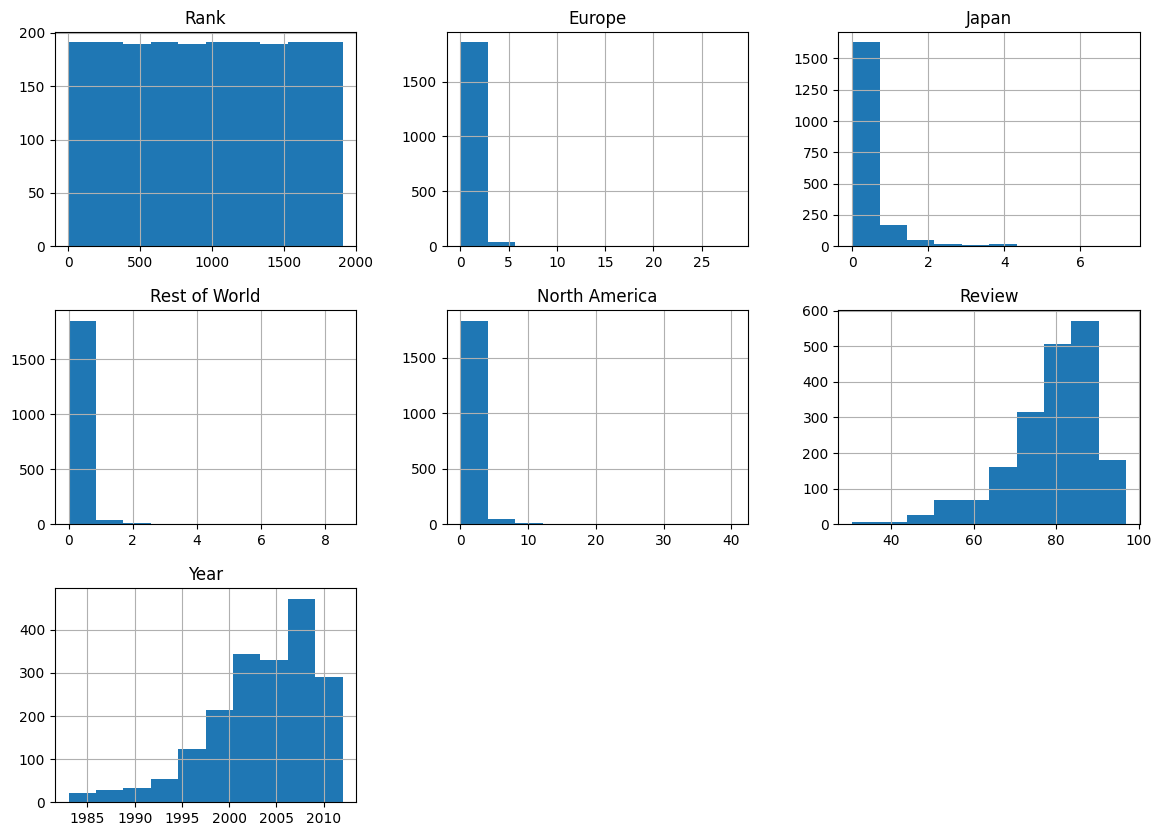

In [ ]:
data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))

Добавляю в датафрейм колонки для всех категориальных столбцов

In [ ]:
cat_genre = data['Genre']
cat_genre = pd.get_dummies(cat_genre)
data = data.drop(columns=['Genre'])
cat_cols.remove('Genre')

data = data.join(cat_genre)
cat_cols.extend(list(cat_genre.columns))
cat_cols

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

### Обучим на подготовленных данных

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[num_cols + cat_cols].values, data[target_col].values, test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

pca = MinMaxScaler()
pca.fit(X_train)
X_train = pca.transform(X_train)

### Константный предиктор

In [ ]:
dr = DummyClassifier()
dr.fit(X_train, y_train)

print_metrics(dr.predict(X_test), y_test)

R^2: 0.0
MSE: 59.21666666666667


### Логистическая регрессия

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: 0.7437520757223512
MSE: 13.716666666666667


In [ ]:
lr = MyLogisticRegression()
lr.fit(X_train, y_train - np.min(data['Year']))

print_metrics(lr.predict(X_test), y_test - np.min(data['Year']))

R^2: 0.6242977700666965
MSE: 21.233333333333334
